# What is Happening to the Bees?

Honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons. You want to investigate this decline and how the trends of the past predict the future for the honeybees.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")

In [3]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [16]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [20]:
prod_per_year = df.groupby(['year']).totalprod.mean()
prod_per_year

year
1998    5.105093e+06
1999    4.706674e+06
2000    5.106000e+06
2001    4.221545e+06
2002    3.892386e+06
2003    4.122091e+06
2004    4.456805e+06
2005    4.243146e+06
2006    3.761902e+06
2007    3.600512e+06
2008    3.974927e+06
2009    3.626700e+06
2010    4.382350e+06
2011    3.680025e+06
2012    3.522675e+06
Name: totalprod, dtype: float64

In [26]:
X = prod_per_year.index.values.reshape(-1,1)
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]])

In [28]:
y = prod_per_year.values
y

array([5105093.02325581, 4706674.41860465, 5106000.        ,
       4221545.45454545, 3892386.36363636, 4122090.90909091,
       4456804.87804878, 4243146.34146341, 3761902.43902439,
       3600512.19512195, 3974926.82926829, 3626700.        ,
       4382350.        , 3680025.        , 3522675.        ])

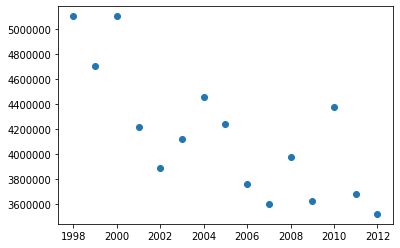

In [30]:
plt.scatter(X, y)
plt.show()

In [34]:
regr = linear_model.LinearRegression()
regr.fit(X,y)
print("Line of Best Fit")
print("Slope: ", regr.coef_[0], "Intercept: ", regr.intercept_)

Line of Best Fit
Slope:  -88303.18915238194 Intercept:  181208083.1073298


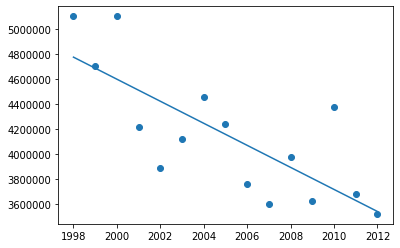

In [35]:
y_predicted = regr.predict(X)
plt.scatter(X, y)
plt.plot(X, y_predicted)
plt.show()

It looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production.

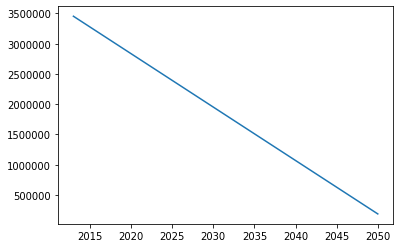

In [36]:
# Our known dataset stops in the year 2012, so we need to create an array that extends the range
X_future = np.array(range(2013, 2051)).reshape(-1,1) # We use reshape to create the 2-D array necessary for the sklearn functions
future_predict = regr.predict(X_future)
plt.plot(X_future, future_predict)

In [37]:
future_predict[-1]

186545.34494683146

In [42]:
print(f"In 1998, {round(y[0], 1)} units of honey were produced on average in each state.")

In 1998, 5105093.0 units of honey were produced on average in each state.


In [43]:
print(f"In 2050, we expect {round(future_predict[-1], 1)} units of honey to be produced on average in each state.")

In 2050, we expect 186545.3 units of honey to be produced on average in each state.


In [49]:
print(f"This represents a {round(100 - (future_predict[-1]/(y[0] + future_predict[-1]) * 100), 1)}% decrease in honey production in a 52 year period.")

This represents a 96.5% decrease in honey production in a 52 year period.
